# Comparison of RIC and RBDS marker set protocol

Reginaldo K Fukuchi, Jan 2023, reginaldo.fukuchi@ufabc.edu.br

This NB compares the marker set protocols employed by the Running Injury Clinic (during my PhD work) and the RBDS study.

In [1]:
# Prepare environment
import os
import scipy.io as spio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Import data
pathname = r'../data'

## RBDS data set

In [3]:
fname_out_RBDS = os.path.join(pathname, 'RBDS_static.csv')
df_s_RBDS = pd.read_csv(fname_out_RBDS, delimiter=',', index_col='Time')

In [4]:
df_s_RBDS.head()

,LMAL_X,LMAL_Y,LMAL_Z,LMAM_X,LMAM_Y,LMAM_Z,LASI_X,LASI_Y,LASI_Z,LGTR_X,...,RTBM_Z,RTTL_X,RTTL_Y,RTTL_Z,RTTM_X,RTTM_Y,RTTM_Z,RTUB_X,RTUB_Y,RTUB_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,705.062866,108.774330,1050.909424,725.535095,119.272575,1129.002441,876.648743,1067.346436,1126.366577,799.197205,...,1345.514282,725.082825,761.838928,1398.587158,676.568359,760.431702,1347.822632,780.426636,462.710876,1343.646973
0.006711,705.066833,108.766876,1050.910889,725.530396,119.266960,1129.005005,876.686035,1067.344360,1126.387573,799.232788,...,1345.495483,725.089050,761.827515,1398.581421,676.584167,760.432800,1347.808350,780.445190,462.712555,1343.645752
0.013423,705.065430,108.771133,1050.902832,725.532959,119.267067,1129.006104,876.736938,1067.349854,1126.407471,799.294189,...,1345.485840,725.094055,761.832520,1398.583130,676.592529,760.428711,1347.793579,780.457764,462.725372,1343.636353
0.020134,705.067078,108.770615,1050.907104,725.535950,119.267815,1129.002930,876.780396,1067.346436,1126.431274,799.340088,...,1345.468140,725.094055,761.823364,1398.575684,676.612793,760.425476,1347.788452,780.471008,462.721649,1343.632812
0.026846,705.060730,108.771179,1050.905151,725.534241,119.267807,1129.004883,876.821350,1067.347900,1126.442627,799.390625,...,1345.458984,725.103516,761.824829,1398.569946,676.621399,760.423767,1347.771729,780.485840,462.709076,1343.625610


## Calculate Euler angles
Test first with static trial

In [19]:
def euler_angles_from_rot_xyz(rot_matrix, unit='deg'):
    """ Compute Euler angles from rotation matrix in the xyz sequence."""
    
    import numpy as np

    R = np.array(rot_matrix, copy=False).astype(np.float64)[:3, :3]
    angles = np.zeros(3)
    
    angles[0] = np.arctan2(-R[2, 1], R[2, 2])
    angles[1] = np.arctan2( R[2, 0], np.sqrt(R[0, 0]**2 + R[1, 0]**2))
    angles[2] = np.arctan2(-R[1, 0], R[0, 0])

    if unit[:3].lower() == 'deg': # convert from rad to degree
        angles = np.rad2deg(angles)

    return angles

In [28]:
df_s_RBDS.head()

,LMAL_X,LMAL_Y,LMAL_Z,LMAM_X,LMAM_Y,LMAM_Z,LASI_X,LASI_Y,LASI_Z,LGTR_X,...,RTBM_Z,RTTL_X,RTTL_Y,RTTL_Z,RTTM_X,RTTM_Y,RTTM_Z,RTUB_X,RTUB_Y,RTUB_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,705.062866,108.774330,1050.909424,725.535095,119.272575,1129.002441,876.648743,1067.346436,1126.366577,799.197205,...,1345.514282,725.082825,761.838928,1398.587158,676.568359,760.431702,1347.822632,780.426636,462.710876,1343.646973
0.006711,705.066833,108.766876,1050.910889,725.530396,119.266960,1129.005005,876.686035,1067.344360,1126.387573,799.232788,...,1345.495483,725.089050,761.827515,1398.581421,676.584167,760.432800,1347.808350,780.445190,462.712555,1343.645752
0.013423,705.065430,108.771133,1050.902832,725.532959,119.267067,1129.006104,876.736938,1067.349854,1126.407471,799.294189,...,1345.485840,725.094055,761.832520,1398.583130,676.592529,760.428711,1347.793579,780.457764,462.725372,1343.636353
0.020134,705.067078,108.770615,1050.907104,725.535950,119.267815,1129.002930,876.780396,1067.346436,1126.431274,799.340088,...,1345.468140,725.094055,761.823364,1398.575684,676.612793,760.425476,1347.788452,780.471008,462.721649,1343.632812
0.026846,705.060730,108.771179,1050.905151,725.534241,119.267807,1129.004883,876.821350,1067.347900,1126.442627,799.390625,...,1345.458984,725.103516,761.824829,1398.569946,676.621399,760.423767,1347.771729,780.485840,462.709076,1343.625610


In [33]:
rkjc = (df_s_RBDS[['RKNL_X','RKNL_Y','RKNL_Z']].values[100]+df_s_RBDS[['RKNM_X','RKNM_Y','RKNM_Z']].values[100])/2
rkjc

array([ 733.43203735,  546.6859436 , 1329.13012695])

In [35]:
rkjc = (df_s_RBDS[['RKNL_X','RKNL_Y','RKNL_Z']].values[100]+df_s_RBDS[['RKNM_X','RKNM_Y','RKNM_Z']].values[100])/2
rajc = (df_s_RBDS[['RMAL_X','RMAL_Y','RMAL_Z']].values[100]+df_s_RBDS[['RMAM_X','RMAM_Y','RMAM_Z']].values[100])/2

v2 = rkjc - rajc
v1 = np.cross(v2, df_s_RBDS[['RMAL_X','RMAL_Y','RMAL_Z']].values[100] - rajc)
v3 = np.cross(v1, v2)

print('Versors:')
v1 = v1/np.linalg.norm(v1)
print('v1 =', v1)
v2 = v2/np.linalg.norm(v2)
print('v2 =', v2)
v3 = v3/np.linalg.norm(v3)
print('v3 =', v3)

Versors:
v1 = [ 0.97634014 -0.03749143  0.21296555]
v2 = [ 0.05184651  0.99671466 -0.06222402]
v3 = [-0.20993302  0.07179333  0.97507633]


In [36]:
RlG = np.array([v1, v2, v3])
print('Rotation matrix from Global to local coordinate system:\n', RlG)

Rotation matrix from Global to local coordinate system:
 [[ 0.97634014 -0.03749143  0.21296555]
 [ 0.05184651  0.99671466 -0.06222402]
 [-0.20993302  0.07179333  0.97507633]]


In [37]:
euler_angles_from_rot_xyz(RlG)

array([ -4.21099924, -12.11842687,  -3.03971816])

# CONTINUAR
## CALCULAR ANGULO DO JOELHO NA CORRIDA
## MUDAR A SEQ EULER PARA ZXY

In [5]:
fname_out_R_RBDS = os.path.join(pathname, 'RBDS_run.csv')
df_r_RBDS = pd.read_csv(fname_out_R_RBDS, delimiter=',', index_col='Time')

In [6]:
df_r_RBDS.head()

,LASI_X,LASI_Y,LASI_Z,LHED_X,LHED_Y,LHED_Z,LHEL_X,LHEL_Y,LHEL_Z,LHEP_X,...,RTBL_Z,RTBM_X,RTBM_Y,RTBM_Z,RTTL_X,RTTL_Y,RTTL_Z,RTTM_X,RTTM_Y,RTTM_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,2420.259766,992.218079,963.925171,2248.016602,36.936264,1112.201294,2269.700439,54.548782,1068.700684,2260.437256,...,1220.158203,2340.021729,534.565857,1166.274048,2355.980225,648.041931,1231.687134,2306.586182,637.986877,1182.760010
0.006668,2418.855469,990.269226,964.056519,2224.396729,37.268295,1111.626831,2246.146484,54.657806,1068.011963,2236.888672,...,1221.252930,2352.635742,532.309326,1168.092407,2365.203125,646.438843,1233.347290,2315.817139,634.595154,1184.833984
0.013336,2418.053711,988.938965,964.259094,2200.811035,37.668098,1111.173828,2222.609863,54.926060,1067.611816,2213.396240,...,1222.161255,2366.121582,531.614136,1169.939331,2374.555420,646.219849,1234.858398,2324.990723,632.330994,1187.102295
0.020004,2416.767334,987.159058,965.014771,2177.300537,38.305260,1111.021484,2199.177979,55.535648,1067.508057,2190.177246,...,1222.913574,2379.001953,532.383545,1171.363647,2383.882324,647.272034,1236.181274,2333.870605,631.130493,1189.600342
0.026673,2415.681396,985.919983,965.522888,2153.892822,38.982204,1110.988770,2175.719238,56.226032,1067.396606,2166.902100,...,1223.486572,2391.377197,534.346802,1172.849243,2392.567627,649.902832,1237.175293,2342.278076,631.113098,1192.028198


## RIC data set

In [7]:
fname_out_RIC = os.path.join(pathname, 'RIC_static.csv')
df_s_RIC = pd.read_csv(fname_out_RIC, delimiter=',', index_col='Time')

In [8]:
df_s_RIC.head()

,RIC_X,RIC_Y,RIC_Z,LIC_X,LIC_Y,LIC_Z,RASI_X,RASI_Y,RASI_Z,LASI_X,...,LELB_Z,LW_X,LW_Y,LW_Z,RBAK_X,RBAK_Y,RBAK_Z,RARM_X,RARM_Y,RARM_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,24.144964,1186.501953,690.302979,45.394676,1193.250000,358.820160,-58.366940,1110.803223,651.372681,-48.910542,...,136.046143,-217.815277,1287.846191,145.004547,161.044846,1530.513916,651.696716,37.805531,1399.390259,813.931702
0.005025,24.149342,1186.498047,690.303223,45.349300,1193.242920,358.869385,-58.410744,1110.811401,651.432922,-48.848274,...,136.032959,-217.842819,1287.799316,144.968643,160.978165,1530.546875,651.692810,37.799965,1399.384399,813.946045
0.010050,24.149654,1186.497803,690.303345,45.391197,1193.255859,358.778748,-58.387333,1110.797974,651.415833,-48.830948,...,135.974808,-217.844437,1287.835938,144.960144,161.020508,1530.567261,651.693420,37.797764,1399.387817,813.948242
0.015075,24.186714,1186.468872,690.373108,45.360054,1193.252319,358.839172,-58.374546,1110.795410,651.402527,-48.841980,...,136.006287,-217.888351,1287.867554,145.000275,160.980759,1530.528564,651.744080,37.733063,1399.360474,813.914124
0.020101,24.152397,1186.469849,690.344238,45.320061,1193.218262,358.845856,-58.393387,1110.808594,651.387634,-48.893497,...,136.023819,-217.894638,1287.856079,144.964432,160.956314,1530.513306,651.748840,37.732792,1399.419189,813.904419


In [9]:
fname_out_R_RIC = os.path.join(pathname, 'RIC_run.csv')
df_r_RIC = pd.read_csv(fname_out_R_RIC, delimiter=',', index_col='Time')

In [10]:
df_r_RIC.head()

,LA_X,LA_Y,LA_Z,LELB_X,LELB_Y,LELB_Z,LHED_X,LHED_Y,LHED_Z,LHEL_X,...,RTTM_Z,RW_X,RW_Y,RW_Z,T2_X,T2_Y,T2_Z,VSAC_X,VSAC_Y,VSAC_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,-398.161560,1531.059204,163.965179,-203.915451,1255.390747,105.111954,-89.617287,253.640991,274.866730,-116.352310,...,439.844635,-659.593994,1325.481079,661.731567,-367.014679,1558.014160,361.150757,-258.306030,1079.420532,338.403290
0.005000,-396.975830,1534.028687,163.801010,-200.577881,1260.241455,105.875885,-102.633423,242.068863,275.785309,-130.274963,...,440.186005,-662.034546,1331.052979,656.429932,-366.713928,1560.372437,360.832336,-258.543060,1082.309814,339.075439
0.010001,-395.712799,1536.789673,163.780914,-197.440231,1265.020386,106.376434,-116.600204,230.331619,276.880188,-144.524170,...,440.613007,-663.557129,1336.546631,651.440247,-366.440308,1563.209229,360.537842,-259.075287,1085.162231,339.930023
0.015001,-394.591675,1539.397583,163.918015,-194.575974,1269.799194,106.865036,-131.050339,218.574860,278.511292,-158.984375,...,441.177704,-665.156128,1341.768799,646.443970,-366.489624,1566.391479,360.356140,-259.805908,1088.077271,340.657166
0.020002,-393.804871,1542.444580,163.567169,-191.887970,1274.587402,107.420563,-146.435577,206.578934,280.512207,-174.112625,...,441.429291,-666.898132,1346.794067,640.757080,-366.825043,1569.148193,360.080872,-260.589386,1091.033081,341.319092


<IPython.core.display.Javascript object>


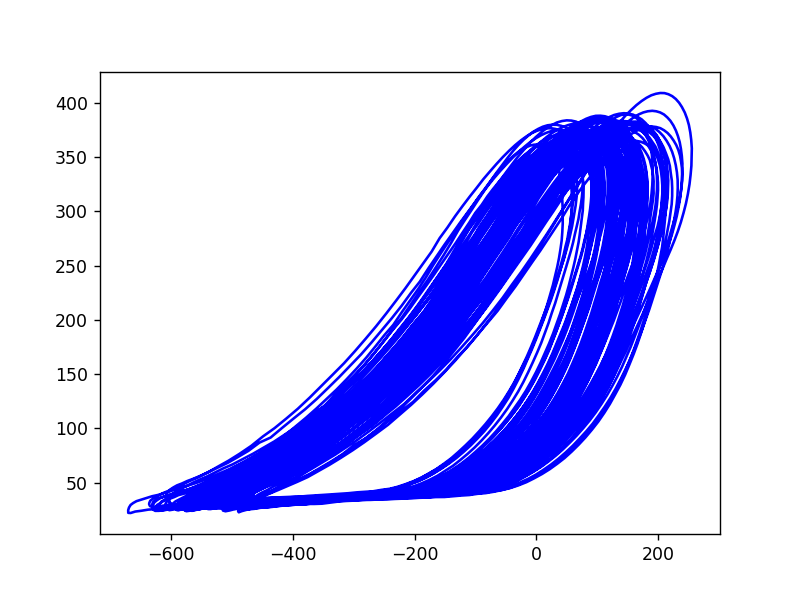

In [16]:
plt.figure()
plt.plot(df_r_RIC.values[:,6],df_r_RIC.values[:,7],'b')
plt.show()

<IPython.core.display.Javascript object>


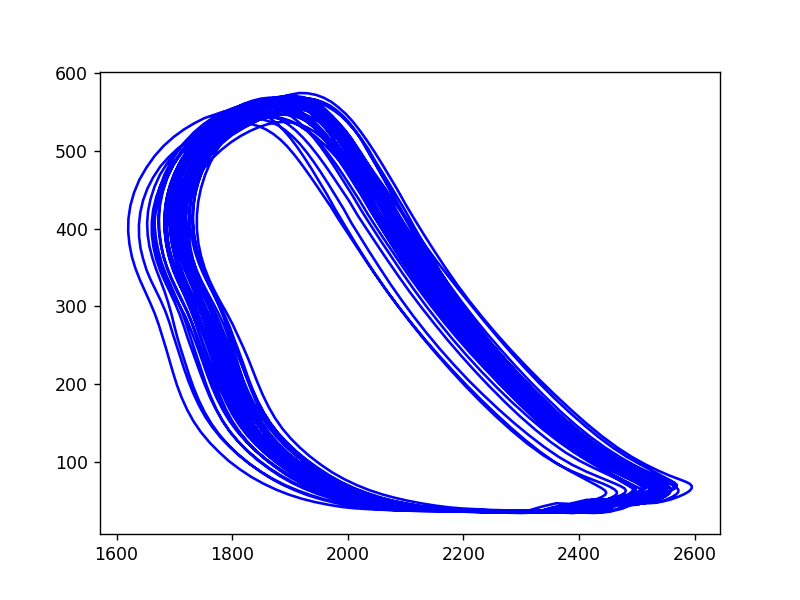

In [18]:
plt.figure()
plt.plot(df_r_RBDS.values[:,3],df_r_RBDS.values[:,4],'b')
plt.show()

### List of marker labels of each protocol

In [7]:
from ordered_set import OrderedSet
# RIC
ls_RIC = df_s_RIC.columns.tolist()
mkr_S_labels_RIC = list(OrderedSet([x[:-2].replace('.','_') for x in ls_RIC]))
# RBDS
ls = df_s_RBDS.columns.tolist()
mkr_S_labels_RBDS = list(OrderedSet([x[:-2].replace('.','_') for x in ls]))

In [9]:
mkr_S_labels_RBDS2=['LMAL', 'LMAM', 'LASI', 'LGTR', 'LHED', 'LHEL', 'LHEP', 
                    'LFIB', 'LIC', 'LKNL', 'LKNM', 'LMH1', 'LTOE', 'LMH5', 'LPSI', 'LSBL', 
                    'LSBM', 'LSTL', 'LSTM', 'LTBL', 'LTBM', 
                    'LTTL', 'LTTM', 'LTUB', 'RMAL', 'RMAM', 'RASI', 'RGTR', 'RHED', 
                    'RHEL', 'RHEP', 'RFIB', 'RIC', 'RKNL', 'RKNM', 'RMH1', 'RTOE', 'RMH5', 'RPSI', 
                    'RSBL', 'RSBM', 'RSTL', 'RSTM', 'RTBL', 
                    'RTBM', 'RTTL', 'RTTM', 'RTUB']

### Rename RBDS df columns to be consistent with RIC names

In [10]:
xyz = list('XYZ')*len(mkr_S_labels_RBDS2)
mkr_S_labels_RBDS3 = [ele for ele in mkr_S_labels_RBDS2 for i in range(3)]
mkr_S_labels_RBDS4 = [mkr_S_labels_RBDS3[i]+'_'+xyz[i] for i in range(len(xyz))]

In [11]:
df_s_RBDS.columns = mkr_S_labels_RBDS4

In [12]:
df_s_RBDS.head()

,LMAL_X,LMAL_Y,LMAL_Z,LMAM_X,LMAM_Y,LMAM_Z,LASI_X,LASI_Y,LASI_Z,LGTR_X,...,RTBM_Z,RTTL_X,RTTL_Y,RTTL_Z,RTTM_X,RTTM_Y,RTTM_Z,RTUB_X,RTUB_Y,RTUB_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,705.062866,108.774330,1050.909424,725.535095,119.272575,1129.002441,876.648743,1067.346436,1126.366577,799.197205,...,1345.514282,725.082825,761.838928,1398.587158,676.568359,760.431702,1347.822632,780.426636,462.710876,1343.646973
0.006711,705.066833,108.766876,1050.910889,725.530396,119.266960,1129.005005,876.686035,1067.344360,1126.387573,799.232788,...,1345.495483,725.089050,761.827515,1398.581421,676.584167,760.432800,1347.808350,780.445190,462.712555,1343.645752
0.013423,705.065430,108.771133,1050.902832,725.532959,119.267067,1129.006104,876.736938,1067.349854,1126.407471,799.294189,...,1345.485840,725.094055,761.832520,1398.583130,676.592529,760.428711,1347.793579,780.457764,462.725372,1343.636353
0.020134,705.067078,108.770615,1050.907104,725.535950,119.267815,1129.002930,876.780396,1067.346436,1126.431274,799.340088,...,1345.468140,725.094055,761.823364,1398.575684,676.612793,760.425476,1347.788452,780.471008,462.721649,1343.632812
0.026846,705.060730,108.771179,1050.905151,725.534241,119.267807,1129.004883,876.821350,1067.347900,1126.442627,799.390625,...,1345.458984,725.103516,761.824829,1398.569946,676.621399,760.423767,1347.771729,780.485840,462.709076,1343.625610


## Plot markers and labels to check accuracy

<IPython.core.display.Javascript object>


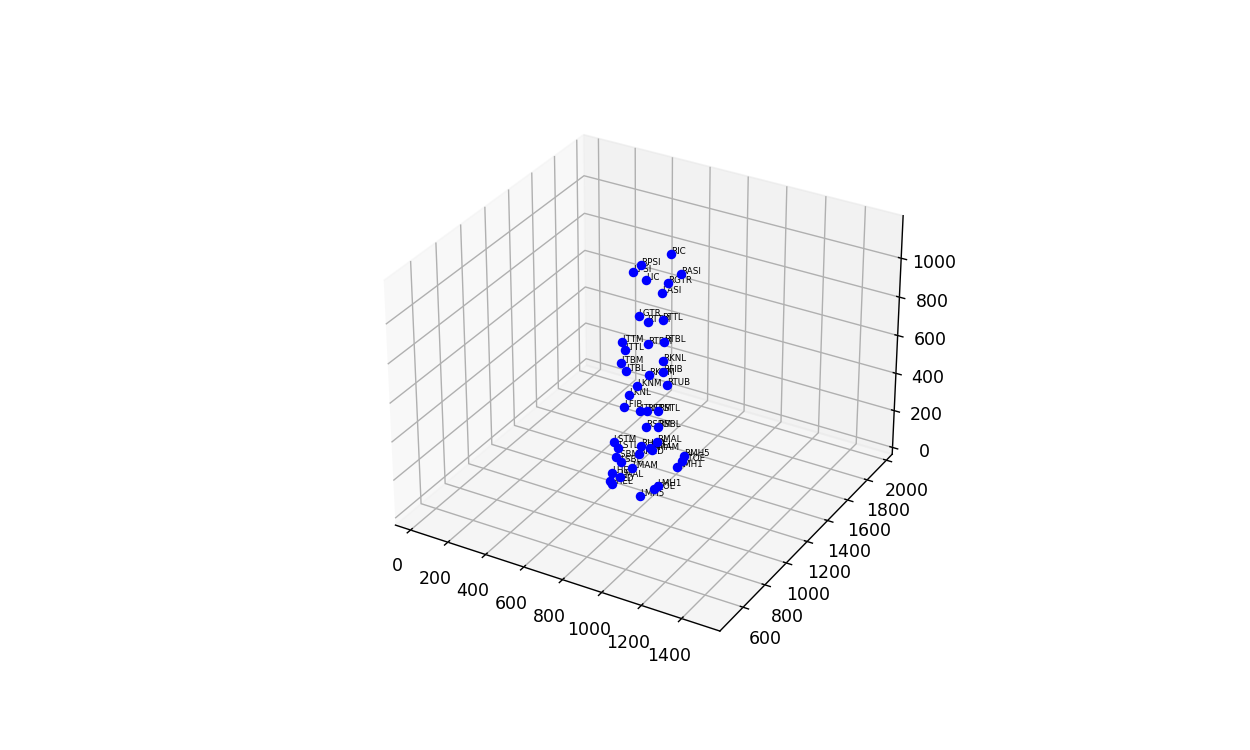

In [13]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
for i in range(len(mkr_S_labels_RBDS2)):
    ydata = df_s_RBDS.values[100,3*i+1]
    xdata = df_s_RBDS.values[100,3*i]
    zdata = df_s_RBDS.values[100,3*i+2]
    ax.scatter(xdata, zdata, ydata, c='b');
    ax.text(xdata,zdata,ydata,  '%s' % (mkr_S_labels_RBDS2[i]), size=5, zorder=1,  
    color='k')
ax.set_aspect('equal')

In [14]:
# Save df with new labels
df_s_RBDS.to_csv(os.path.join(pathname, 'RBDS_static_2.csv'))